In [1]:
from Implementación.BinaryTree import BinaryTree
from Implementación.BinarySearchTree import BinarySearchTree
from Implementación.BNode import BNode
from Implementación.DoubleList import DoubleList
from Implementación.Queue import Queue
from Implementación.Stack import Stack
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Métodos para dibujar el árbol
def add_edges(root, graph, pos, x=0, y=0, layer=1, dx=1.0, dy=1.0):
    if root is not None:
        pos[root.getData()] = (x, -layer)
        if root.getLeft() is not None:
            graph.add_edge(root.getData(), root.getLeft().getData())
            add_edges(root.getLeft(), graph, pos, x - dx / 2, y - dy, layer + 1, dx / 2, dy)
        if root.getRight() is not None:
            graph.add_edge(root.getData(), root.getRight().getData())
            add_edges(root.getRight(), graph, pos, x + dx / 2, y - dy, layer + 1, dx / 2, dy)


def draw_binary_tree(raiz):
    graph = nx.Graph()
    pos = {}
    graph.add_node(raiz.getData())
    add_edges(raiz, graph, pos)

    options = {
        "node_color": "skyblue",
        "node_size": 1000,
        "with_labels": True,
        "font_size": 10,
        "font_color": "black",
        "font_weight": "bold",
        "width": 2,
    }

    nx.draw(graph, pos, **options)
    plt.show()

# Ejercicio 1

El profesor George O'Jungle tiene un árbol binario de 27 nodos, en el que cada nodo está etiquetado con una única letra del alfabeto romano o el carácter &. Los recorridos preorder y postorder del árbol. Los recorridos preorder y postorder del árbol visitan los nodos en el siguiente orden:
- Preorder: I Q J H L E M V O T S B R G Y Z K C A & F P N U D W X
- Postorder: H E M L J V Q S G Y R Z B T C P U D N F W & X A K O I

Dibuje el árbol binario de George

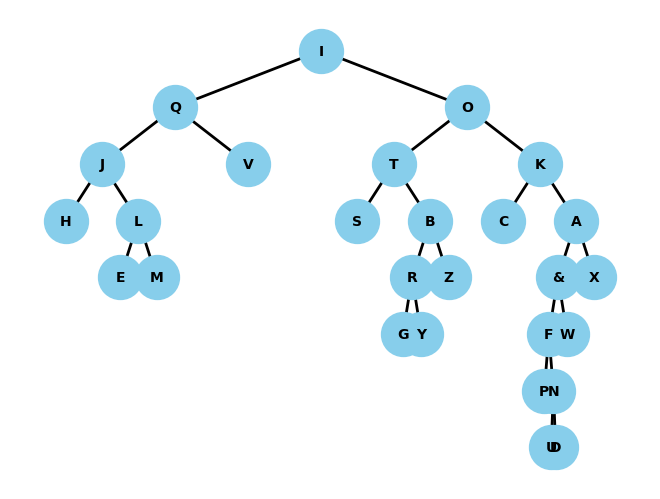

In [12]:
# Algoritmo para construir el árbol binario con los recorridos preorder y postorder
def construir_arbol(preorder, postorder):
    '''
    Construye un árbol binario a partir de sus recorridos preorder y postorder
    Entrada:
        preorder: lista con el recorrido preorder del árbol
        postorder: lista con el recorrido postorder del árbol
    Salida:
        árbol binario construido
    '''
    if len(preorder) == 0:
        return None
    if len(preorder) == 1:
        return BNode(preorder[0])
    raiz = BNode(preorder[0])
    i = postorder.index(preorder[1])
    raiz.setLeft(construir_arbol(preorder[1:i+2], postorder[:i+1]))
    raiz.setRight(construir_arbol(preorder[i+2:], postorder[i+1:-1]))
    return raiz

preorder = ['I', 'Q', 'J', 'H', 'L', 'E', 'M', 'V', 'O', 'T', 'S', 'B', 'R', 'G', 'Y', 'Z', 'K', 'C', 'A', '&', 'F', 'P', 'N', 'U', 'D', 'W', 'X']
postorder = ['H', 'E', 'M', 'L', 'J', 'V', 'Q', 'S', 'G', 'Y', 'R', 'Z', 'B', 'T', 'C', 'P', 'U', 'D', 'N', 'F', 'W', '&', 'X', 'A', 'K', 'O', 'I']
raiz = construir_arbol(preorder, postorder)

# Dibujo del árbol binario
draw_binary_tree(raiz)

# Ejercicio 2
Recuerde, un árbol binario es completo si cada nodo interno tiene exactamente dos hijos
- Describa y analice un algoritmo recursivo para reconstruir un árbol binario completo arbitrario, dadas las secuencias de sus nodos en preorden y postorden como entrada.
- Demuestre que no existe ningún algoritmo para reconstruir un árbol binario arbitrario a partir de sus secuencias de nodos en preorden y postorden. hint: basta dar un contraejemplo

In [13]:
# Algoritmo para construir el árbol binario con los recorridos preorder y postorder
def construir_arbol(preorder, postorder):
    '''
    Construye un árbol binario a partir de sus recorridos preorder y postorder
    Entrada:
        preorder: lista con el recorrido preorder del árbol
        postorder: lista con el recorrido postorder del árbol
    Salida:
        árbol binario construido
    '''
    if len(preorder) == 0:
        return None
    if len(preorder) == 1:
        return BNode(preorder[0])
    raiz = BNode(preorder[0])
    i = postorder.index(preorder[1])
    raiz.setLeft(construir_arbol(preorder[1:i+2], postorder[:i+1]))
    raiz.setRight(construir_arbol(preorder[i+2:], postorder[i+1:-1]))
    return raiz

# Ejercicio 3
Dados dos nodos U y V de un árbol binario, determine si U es ancestro de V recursivamente.

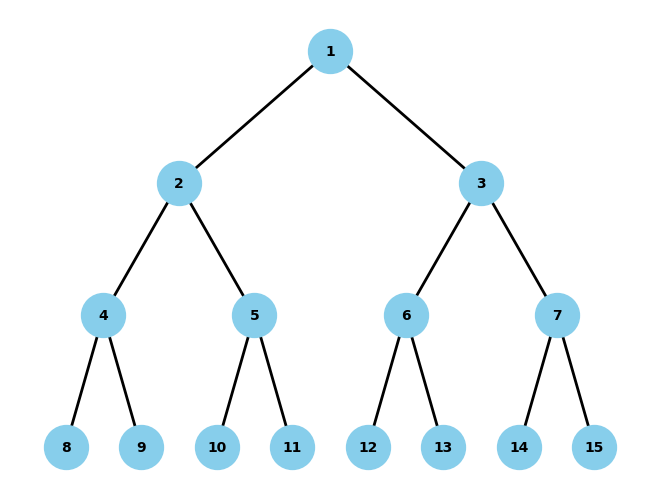

4
True
15
False


In [14]:
def ancestro(u, v):
    '''
    Determina si u es ancestro de v
    Entrada:
        u: nodo del árbol
        v: nodo del árbol
    Salida:
        True si u es ancestro de v, False en caso contrario
    '''
    if u is None:
        return False
    if u == v:
        return True
    return ancestro(u.getLeft(), v) or ancestro(u.getRight(), v)

# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(1)
arbol.root().setLeft(BNode(2))
arbol.root().setRight(BNode(3))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))
arbol.root().getRight().setLeft(BNode(6))
arbol.root().getRight().setRight(BNode(7))
arbol.root().getLeft().getLeft().setLeft(BNode(8))
arbol.root().getLeft().getLeft().setRight(BNode(9))
arbol.root().getLeft().getRight().setLeft(BNode(10))
arbol.root().getLeft().getRight().setRight(BNode(11))
arbol.root().getRight().getLeft().setLeft(BNode(12))
arbol.root().getRight().getLeft().setRight(BNode(13))
arbol.root().getRight().getRight().setLeft(BNode(14))
arbol.root().getRight().getRight().setRight(BNode(15))

draw_binary_tree(arbol.root())

u = arbol.root().getLeft().getLeft()
print(u.getData())
print(ancestro(u, u)) # Debe imprimir True
v = arbol.root().getRight().getRight().getRight()
print(v.getData())
print(ancestro(u, v)) # Debe imprimir False


# Ejercicio 4
Convierta un Árbol Binario dado en una Lista Doblemente Enlazada.

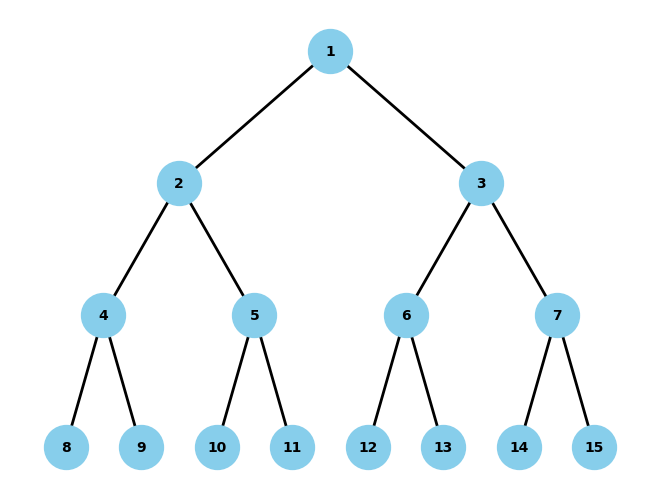

[8, 4, 9, 2, 10, 5, 11, 1, 12, 6, 13, 3, 14, 7, 15]


In [15]:
def convertir_arbol_lista_aux(u, lista):
    '''
    Convierte un árbol binario en una lista doblemente enlazada
    Entrada:
        u: nodo del árbol
        lista: lista doblemente enlazada
    Salida:
        lista doblemente enlazada
    '''
    if u is not None:
        convertir_arbol_lista_aux(u.getLeft(), lista)
        lista.addLast(u.getData())
        convertir_arbol_lista_aux(u.getRight(), lista)

def convertir_arbol_lista(arbol):
    '''
    Convierte un árbol binario en una lista doblemente enlazada
    Entrada:
        arbol: árbol binario
    Salida:
        lista doblemente enlazada
    '''
    if arbol.isEmpty():
        return DoubleList()
    lista = DoubleList()
    convertir_arbol_lista_aux(arbol.root(), lista)
    return lista


# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(1)
arbol.root().setLeft(BNode(2))
arbol.root().setRight(BNode(3))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))
arbol.root().getRight().setLeft(BNode(6))
arbol.root().getRight().setRight(BNode(7))
arbol.root().getLeft().getLeft().setLeft(BNode(8))
arbol.root().getLeft().getLeft().setRight(BNode(9))
arbol.root().getLeft().getRight().setLeft(BNode(10))
arbol.root().getLeft().getRight().setRight(BNode(11))
arbol.root().getRight().getLeft().setLeft(BNode(12))
arbol.root().getRight().getLeft().setRight(BNode(13))
arbol.root().getRight().getRight().setLeft(BNode(14))
arbol.root().getRight().getRight().setRight(BNode(15))

draw_binary_tree(arbol.root())

lista = convertir_arbol_lista(arbol)
# Debe imprimir 8 <-> 4 <-> 9 <-> 2 <-> 10 <-> 5 <-> 11 <-> 1 <-> 12 <-> 6 <-> 13 <-> 3 <-> 14 <-> 7 <-> 15
print(lista)

# Ejercicio 5
El algoritmo de Recorrido Por Niveles se define como un método para recorrer un árbol de forma que todos los nodos presentes en el mismo nivel se recorran por completo antes de recorrer el siguiente nivel. Este método también es conocido como Búsqueda a lo Ancho (BFS).
Implemente dicho algoritmo. (hint: use una cola (Queue) como se muestra en la Lectura 11 para hallar el padre de un nodo)

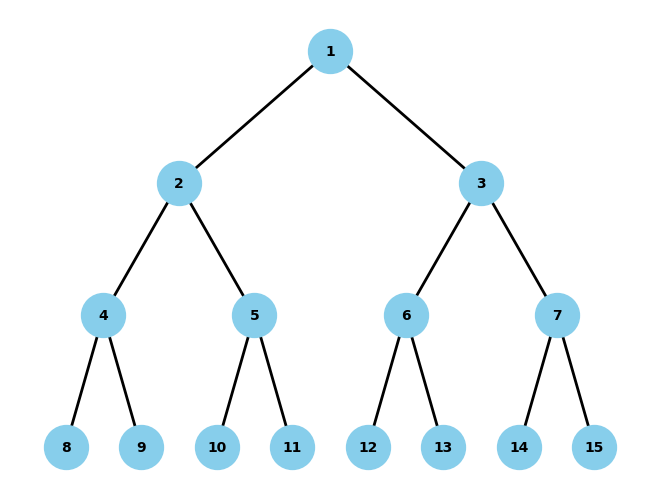

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [16]:
def recorrido_por_niveles(arbol):
    '''
    Recorre un árbol por niveles
    Entrada:
        arbol: árbol binario
    Salida:
        lista con los nodos del árbol recorridos por niveles
    '''
    if arbol.isEmpty():
        return []
    cola = Queue()
    cola.enqueue(arbol.root())
    recorrido = []
    while not cola.isEmpty():
        u = cola.dequeue()
        recorrido.append(u.getData())
        if u.getLeft() is not None:
            cola.enqueue(u.getLeft())
        if u.getRight() is not None:
            cola.enqueue(u.getRight())
    return recorrido

# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(1)
arbol.root().setLeft(BNode(2))
arbol.root().setRight(BNode(3))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))
arbol.root().getRight().setLeft(BNode(6))
arbol.root().getRight().setRight(BNode(7))
arbol.root().getLeft().getLeft().setLeft(BNode(8))
arbol.root().getLeft().getLeft().setRight(BNode(9))
arbol.root().getLeft().getRight().setLeft(BNode(10))
arbol.root().getLeft().getRight().setRight(BNode(11))
arbol.root().getRight().getLeft().setLeft(BNode(12))
arbol.root().getRight().getLeft().setRight(BNode(13))
arbol.root().getRight().getRight().setLeft(BNode(14))
arbol.root().getRight().getRight().setRight(BNode(15))

draw_binary_tree(arbol.root())

# Debe imprimir [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15]
print(recorrido_por_niveles(arbol))

# Ejercicio 6
Dé un ejemplo de un Árbol Binario de Búsqueda T y de una llave k tal que T. find(k) corra en tiempo Ω(n), donde n es la cantidad de nodos en el árbol. Es decir, muestre que existen casos en los que el método find no es eficiente y recorre todo el árbol.

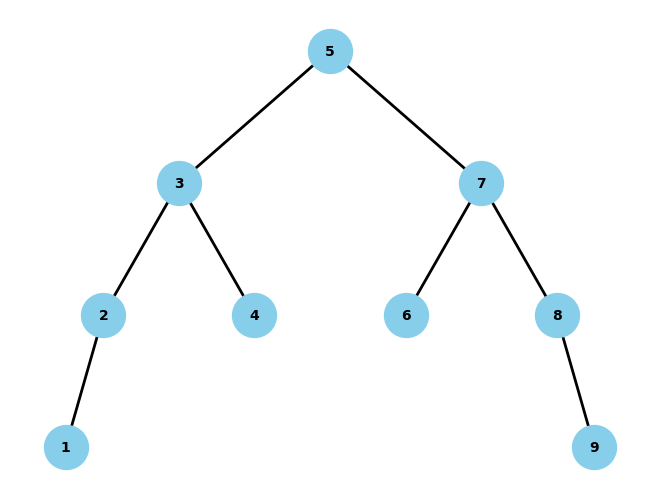

9


In [5]:
# Ejemplo de un árbol binario de búsqueda en el que el método find no es eficiente
arbol = BinarySearchTree()
arbol.addRoot(5)
arbol.root().setLeft(BNode(3))
arbol.root().setRight(BNode(7))
arbol.root().getLeft().setLeft(BNode(2))
arbol.root().getLeft().setRight(BNode(4))
arbol.root().getRight().setLeft(BNode(6))
arbol.root().getRight().setRight(BNode(8))
arbol.root().getLeft().getLeft().setLeft(BNode(1))
arbol.root().getRight().getRight().setRight(BNode(9))

draw_binary_tree(arbol.root())

# Debe imprimir 9
print(arbol.find(9).getData())


# Ejercicio 7
Un subárbol de un Árbol Binario se entiende como cualquier subgrafo conectado. En otras palabras, es como si tomaras un "trozo" más pequeño de un árbol binario, que a su vez, también es un árbol binario en sí mismo.
Un Árbol Binario es perfecto si cada nodo interno tiene dos hijos y cada hoja tiene exactamente la misma profundidad.
Describa y analice un algoritmo recursivo para calcular el subárbol perfecto más grande de un árbol binario dado. Su algoritmo debe devolver tanto la raíz como la profundidad de este subárbol.

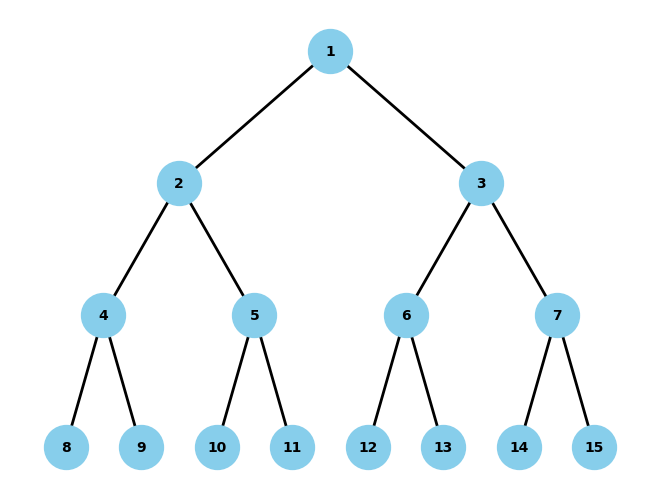

1
4


In [12]:
def subarbol_perfecto(u):
    '''
    Calcula el subárbol perfecto más grande de un árbol binario
    Entrada:
        u: nodo del árbol
    Salida:
        tupla con la raíz y la profundidad del subárbol perfecto más grande
    '''
    if u is None:
        return None, 0
    if u.getLeft() is None and u.getRight() is None:
        return u, 1
    raiz_izq, profundidad_izq = subarbol_perfecto(u.getLeft())
    raiz_der, profundidad_der = subarbol_perfecto(u.getRight())
    if profundidad_izq == profundidad_der:
        return u, profundidad_izq + 1
    if profundidad_izq > profundidad_der:
        return raiz_izq, profundidad_izq + 1
    return raiz_der, profundidad_der + 1

# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(1)
arbol.root().setLeft(BNode(2))
arbol.root().setRight(BNode(3))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))
arbol.root().getRight().setLeft(BNode(6))
arbol.root().getRight().setRight(BNode(7))
arbol.root().getLeft().getLeft().setLeft(BNode(8))
arbol.root().getLeft().getLeft().setRight(BNode(9))
arbol.root().getLeft().getRight().setLeft(BNode(10))
arbol.root().getLeft().getRight().setRight(BNode(11))
arbol.root().getRight().getLeft().setLeft(BNode(12))
arbol.root().getRight().getLeft().setRight(BNode(13))
arbol.root().getRight().getRight().setLeft(BNode(14))
arbol.root().getRight().getRight().setRight(BNode(15))

draw_binary_tree(arbol.root())

raiz, profundidad = subarbol_perfecto(arbol.root())
# Debe imprimir 1
print(raiz.getData())
# Debe imprimir 4
print(profundidad)

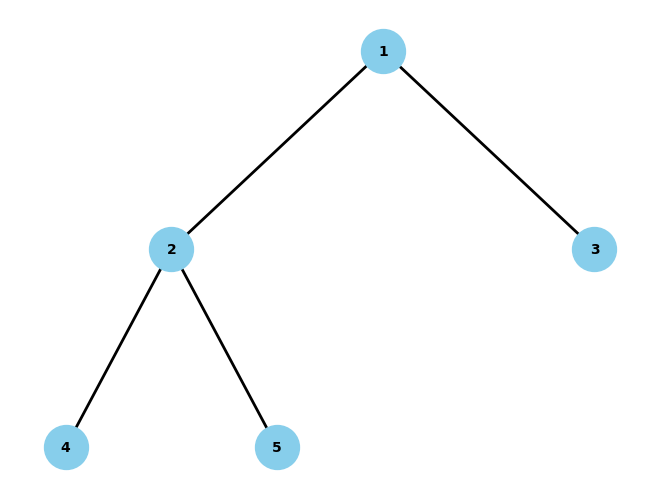

The root of the largest perfect subtree is 1, and its depth is 1.


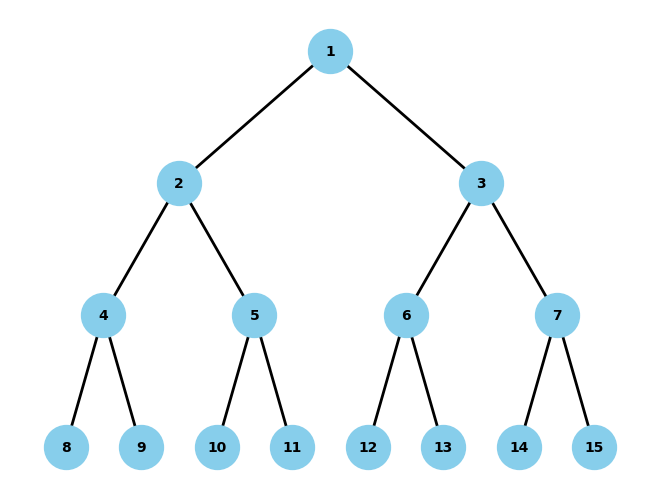

The root of the largest perfect subtree is 6, and its depth is 2.


In [18]:
def largestPerfectSubtree(root: BNode) -> (BNode, int):
    stack = [(root, 0, 0)]
    max_root = root
    max_depth = 0

    while stack:
        node, left_size, right_size = stack.pop()

        if node:
            # Calculate the size of the left and right subtrees
            if node.getLeft():
                stack.append((node.getLeft(), left_size + 1, right_size))
            else:
                left_size = 0

            if node.getRight():
                stack.append((node.getRight(), left_size, right_size + 1))
            else:
                right_size = 0

            # Check if the subtree is perfect
            if left_size == right_size and (left_size == 0 or (node.getLeft() and node.getRight())):
                # Update the maximum perfect subtree
                if left_size + 1 > max_depth:
                    max_root = node
                    max_depth = left_size + 1

    return max_root, max_depth

# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(1)
arbol.root().setLeft(BNode(2))
arbol.root().setRight(BNode(3))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))

draw_binary_tree(arbol.root())

max_root, max_depth = largestPerfectSubtree(arbol.root())
print(f"The root of the largest perfect subtree is {max_root.getData()}, and its depth is {max_depth}.")

# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(1)
arbol.root().setLeft(BNode(2))
arbol.root().setRight(BNode(3))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))
arbol.root().getRight().setLeft(BNode(6))
arbol.root().getRight().setRight(BNode(7))
arbol.root().getLeft().getLeft().setLeft(BNode(8))
arbol.root().getLeft().getLeft().setRight(BNode(9))
arbol.root().getLeft().getRight().setLeft(BNode(10))
arbol.root().getLeft().getRight().setRight(BNode(11))
arbol.root().getRight().getLeft().setLeft(BNode(12))
arbol.root().getRight().getLeft().setRight(BNode(13))
arbol.root().getRight().getRight().setLeft(BNode(14))
arbol.root().getRight().getRight().setRight(BNode(15))

draw_binary_tree(arbol.root())

max_root, max_depth = largestPerfectSubtree(arbol.root())
print(f"The root of the largest perfect subtree is {max_root.getData()}, and its depth is {max_depth}.")

# Ejercicio 8
Dado un Árbol Binario, diseñe y analice un algoritmo recursivo para convertir dicho árbol binario en su Árbol Espejo. Imagine como si pusiera el Árbol Binario al frente de un espejo. Nos interesa conseguir la imagen del árbol en el espejo.

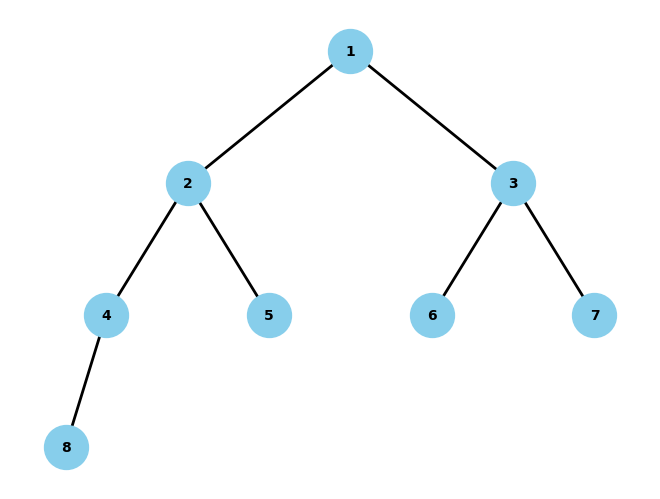

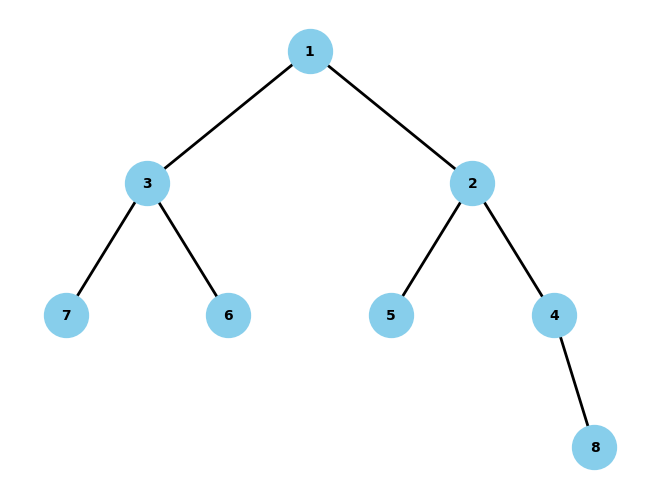

In [19]:
def arbol_espejo(u):
    '''
    Construye el árbol espejo de un árbol binario
    Entrada:
        u: nodo del árbol
    Salida:
        árbol espejo
    '''
    if u is None:
        return None
    raiz = BNode(u.getData())
    raiz.setLeft(arbol_espejo(u.getRight()))
    raiz.setRight(arbol_espejo(u.getLeft()))
    return raiz

# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(1)
arbol.root().setLeft(BNode(2))
arbol.root().setRight(BNode(3))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))
arbol.root().getRight().setLeft(BNode(6))
arbol.root().getRight().setRight(BNode(7))
arbol.root().getLeft().getLeft().setLeft(BNode(8))
    
draw_binary_tree(arbol.root())

arbol_esp = arbol_espejo(arbol.root())
draw_binary_tree(arbol_esp)


# Ejercicio 9
Dado un Árbol Binario, diseñe y analice un algoritmo recursivo que identifique si el árbol es un Árbol de Suma s o no. En un Árbol d e Sumas, el valor de cada nodo interno es igual a la suma de todos los elementos presentes en su subárbol izquierdo y derecho. El valor de un nodo hoja puede ser cualquier cosa y el valor de un nodo hijo ausente se considera 0.

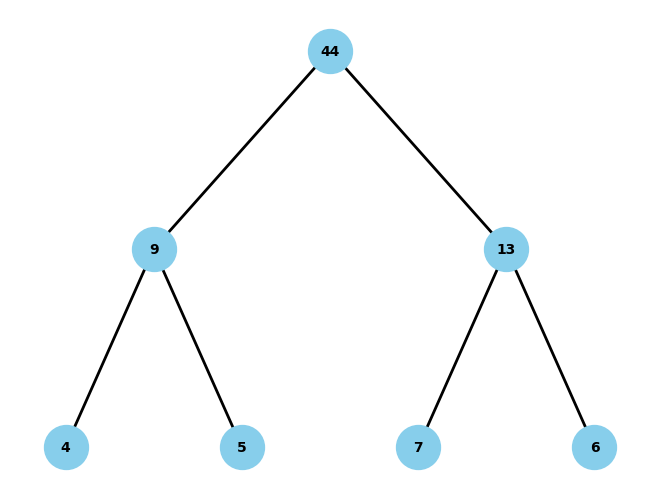

True


In [28]:
def suma_subarbol(u):
    '''
    Calcula la suma de los elementos de un subárbol
    Entrada:
        u: nodo del árbol
    Salida:
        suma de los elementos del subárbol
    '''
    if u is None:
        return 0
    return u.getData() + suma_subarbol(u.getLeft()) + suma_subarbol(u.getRight())

def arbol_suma(u):
    '''
    Determina si un árbol binario es un árbol de suma
    Entrada:
        u: nodo del árbol
    Salida:
        True si el árbol es un árbol de suma, False en caso contrario
    '''
    if u is None:
        return True
    if u.getLeft() is None and u.getRight() is None:
        return True
    if u.getLeft() is None:
        return u.getData() == suma_subarbol(u.getRight())
    if u.getRight() is None:
        return u.getData() == suma_subarbol(u.getLeft())
    return u.getData() == suma_subarbol(u.getLeft()) + suma_subarbol(u.getRight())

# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(44)
arbol.root().setLeft(BNode(9))
arbol.root().setRight(BNode(13))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))
arbol.root().getRight().setRight(BNode(6))
arbol.root().getRight().setLeft(BNode(7))

draw_binary_tree(arbol.root())

# Debe imprimir True
print(arbol_suma(arbol.root()))

# Ejercicio 10
Como he mencionado en numerosas ocasiones, la recursión es el método más poderoso para diseñar algoritmos. Lastimosamente, en la práctica puede llegar a ser bastante ineficiente. Por suerte, cualquier algoritmo recursivo se puede replantear de forma iterativa (aunque lograr esto puede ser difícil).
- Dado un Árbol Binario, escriba un algoritmo iterativo que imprima el recorrido Preorden del árbol binario dado. (hint: use una pila (Stack))
- Consulte algoritmos iterativos para imprimir los recorridos Inorden y Postorden de un Árbol Binario.

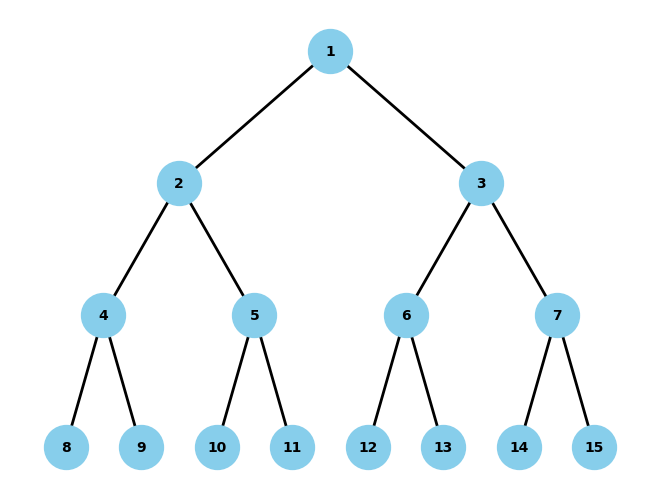

[1, 2, 4, 8, 9, 5, 10, 11, 3, 6, 12, 13, 7, 14, 15]


In [29]:
def recorrido_preorden_iterativo(arbol):
    '''
    Recorre un árbol binario en preorden de forma iterativa
    Entrada:
        arbol: árbol binario
    Salida:
        lista con los nodos del árbol recorridos en preorden
    '''
    if arbol.isEmpty():
        return []
    pila = Stack()
    pila.push(arbol.root())
    recorrido = []
    while not pila.isEmpty():
        u = pila.pop()
        recorrido.append(u.getData())
        if u.getRight() is not None:
            pila.push(u.getRight())
        if u.getLeft() is not None:
            pila.push(u.getLeft())
    return recorrido

# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(1)
arbol.root().setLeft(BNode(2))
arbol.root().setRight(BNode(3))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))
arbol.root().getRight().setLeft(BNode(6))
arbol.root().getRight().setRight(BNode(7))
arbol.root().getLeft().getLeft().setLeft(BNode(8))
arbol.root().getLeft().getLeft().setRight(BNode(9))
arbol.root().getLeft().getRight().setLeft(BNode(10))
arbol.root().getLeft().getRight().setRight(BNode(11))
arbol.root().getRight().getLeft().setLeft(BNode(12))
arbol.root().getRight().getLeft().setRight(BNode(13))
arbol.root().getRight().getRight().setLeft(BNode(14))
arbol.root().getRight().getRight().setRight(BNode(15))

draw_binary_tree(arbol.root())

# Debe imprimir [1, 2, 4, 8, 9, 5, 10, 11, 3, 6, 12, 13, 7, 14, 15]
print(recorrido_preorden_iterativo(arbol))

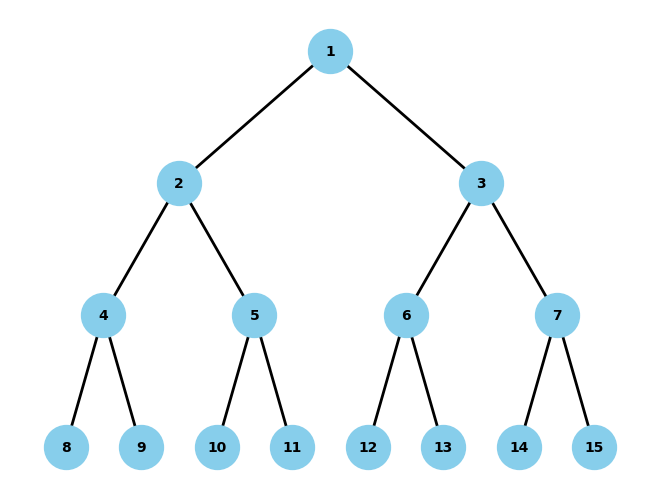

[8, 4, 9, 2, 10, 5, 11, 1, 12, 6, 13, 3, 14, 7, 15]


In [30]:
def recorrido_inorden_iterativo(arbol):
    '''
    Recorre un árbol binario en inorden de forma iterativa
    Entrada:
        arbol: árbol binario
    Salida:
        lista con los nodos del árbol recorridos en inorden
    '''
    if arbol.isEmpty():
        return []
    pila = Stack()
    u = arbol.root()
    recorrido = []
    while not pila.isEmpty() or u is not None:
        if u is not None:
            pila.push(u)
            u = u.getLeft()
        else:
            u = pila.pop()
            recorrido.append(u.getData())
            u = u.getRight()
    return recorrido

# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(1)
arbol.root().setLeft(BNode(2))
arbol.root().setRight(BNode(3))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))
arbol.root().getRight().setLeft(BNode(6))
arbol.root().getRight().setRight(BNode(7))
arbol.root().getLeft().getLeft().setLeft(BNode(8))
arbol.root().getLeft().getLeft().setRight(BNode(9))
arbol.root().getLeft().getRight().setLeft(BNode(10))
arbol.root().getLeft().getRight().setRight(BNode(11))
arbol.root().getRight().getLeft().setLeft(BNode(12))
arbol.root().getRight().getLeft().setRight(BNode(13))
arbol.root().getRight().getRight().setLeft(BNode(14))
arbol.root().getRight().getRight().setRight(BNode(15))

draw_binary_tree(arbol.root())

# Debe imprimir [8, 4, 9, 2, 10, 5, 11, 1, 12, 6, 13, 3, 14, 7, 15]
print(recorrido_inorden_iterativo(arbol))

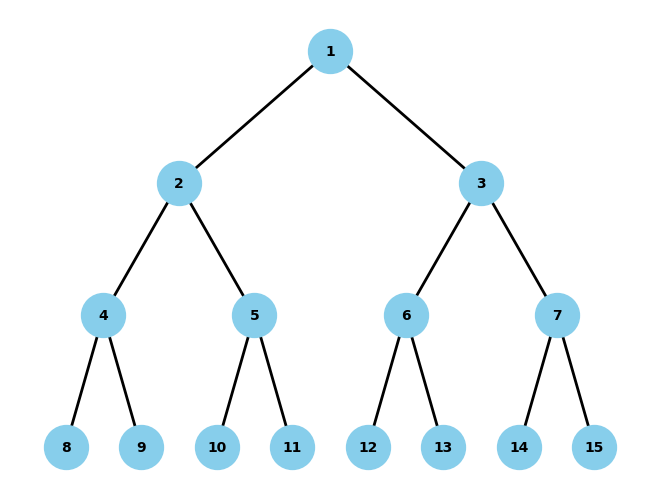

[8, 9, 4, 10, 11, 5, 2, 12, 13, 6, 14, 15, 7, 3, 1]


In [31]:
def recorrido_postorden_iterativo(arbol):
    '''
    Recorre un árbol binario en postorden de forma iterativa
    Entrada:
        arbol: árbol binario
    Salida:
        lista con los nodos del árbol recorridos en postorden
    '''
    if arbol.isEmpty():
        return []
    pila = Stack()
    pila.push(arbol.root())
    recorrido = []
    while not pila.isEmpty():
        u = pila.pop()
        recorrido.append(u.getData())
        if u.getLeft() is not None:
            pila.push(u.getLeft())
        if u.getRight() is not None:
            pila.push(u.getRight())
    return recorrido[::-1]

# Caso de prueba
arbol = BinaryTree()
arbol.addRoot(1)
arbol.root().setLeft(BNode(2))
arbol.root().setRight(BNode(3))
arbol.root().getLeft().setLeft(BNode(4))
arbol.root().getLeft().setRight(BNode(5))
arbol.root().getRight().setLeft(BNode(6))
arbol.root().getRight().setRight(BNode(7))
arbol.root().getLeft().getLeft().setLeft(BNode(8))
arbol.root().getLeft().getLeft().setRight(BNode(9))
arbol.root().getLeft().getRight().setLeft(BNode(10))
arbol.root().getLeft().getRight().setRight(BNode(11))
arbol.root().getRight().getLeft().setLeft(BNode(12))
arbol.root().getRight().getLeft().setRight(BNode(13))
arbol.root().getRight().getRight().setLeft(BNode(14))
arbol.root().getRight().getRight().setRight(BNode(15))

draw_binary_tree(arbol.root())

# Debe imprimir [8, 9, 4, 10, 11, 5, 2, 12, 13, 6, 14, 15, 7, 3, 1]
print(recorrido_postorden_iterativo(arbol))